In [1]:
import Preprocessing_new as prep
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models
from sklearn import metrics

Welcome to JupyROOT 6.28/04


In [210]:
saved_model = models.load_model("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/ultima_versione_buoni/tf_model_new/good_models/cams_model_aug2.keras")

In [211]:
weights = saved_model.get_weights()

In [4]:
#dataset1
train_ds1, val_ds1, test_ds1, train_labels1, val_labels1, test_labels1 = prep.PrepareDataSingleFile("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/data/initial_data_good/sensors.root","/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/data/initial_data_good/response.drdf")

In [5]:
#dataset2
train_ds2, val_ds2, test_ds2, train_labels2, val_labels2, test_labels2 = prep.PrepareDataSingleFile("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/data/new_data/sensors_pde25.root","/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/data/new_data/response_pde25.drdf")

In [6]:
#dataset3
train_ds3, val_ds3, test_ds3, train_labels3, val_labels3, test_labels3 = prep.PrepareDataSingleFile("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/data/new_data2/sensors.root","/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/data/new_data2/response.drdf")

In [7]:
train_ds = np.concatenate((train_ds1, train_ds2, train_ds3), axis=0)
val_ds = np.concatenate((val_ds1, val_ds2, val_ds3), axis=0)
test_ds = np.concatenate((test_ds1, test_ds2, test_ds3), axis=0)

train_labels = np.concatenate((train_labels1, train_labels2, train_labels3), axis=0)
val_labels = np.concatenate((val_labels1, val_labels2, val_labels3), axis=0)
test_labels = np.concatenate((test_labels1, test_labels2, test_labels3), axis=0)

In [212]:
predictions = saved_model.predict(test_ds)

183/183 [==============================] - 1s 3ms/step


In [213]:
predictions = np.squeeze(predictions)

In [214]:
i = 0
predictions_approx = []
for value in predictions:
    value_approx = int(round(value,0))
    predictions_approx.append(value_approx)

predictions_approx = np.asarray(predictions_approx)

In [11]:
file = prep.load_drdf("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/data/initial_data/response.drdf")
cam_list = prep.CamList("/Users/giacomosantoni/Desktop/TESI/Progetto_ML/blindcams/data/initial_data/response.drdf")

[[5621  178]
 [   9   18]]


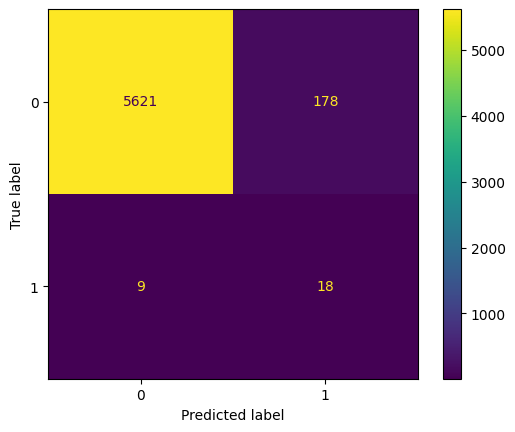

In [215]:
#test_labels ha shape 4860
cm = metrics.confusion_matrix(test_labels, predictions_approx)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

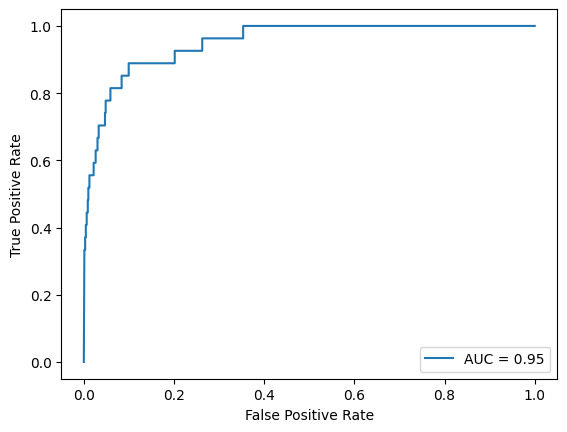

In [216]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predictions)
roc_auc = metrics.auc(fpr, tpr)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

In [217]:
mismatch_list = []
for i in range(len(test_ds)):
    if test_labels[i] != predictions_approx[i]:
        mismatch_list.append(i)

fn_list = []
for i in range(len(test_ds)):
    if test_labels[i] == 1 and predictions_approx[i] == 0:
        fn_list.append(i)

fp_list = []
for i in range(len(test_ds)):
    if test_labels[i] == 0 and predictions_approx[i] == 1:
        fp_list.append(i)

In [105]:
# for i in fn_list: 
#     plt.imshow(test_ds[i])
#     plt.colorbar()
#     plt.show()

In [ ]:
# for i in fp_list:
#     plt.imshow(test_ds[i])
#     plt.colorbar()
#     plt.show()

In [218]:
#calcolo i fotoni totali sulle camere predette male
tot_photons_all_wrong_cams = []
for i in mismatch_list:
    tot_photons_wrong_cam = np.sum(test_ds[i])
    tot_photons_all_wrong_cams.append(tot_photons_wrong_cam)

In [119]:
n = 0
for i in test_ds:
    if sum(map(sum,i))<60:
        n+=1
        # plt.imshow(i)
        # plt.colorbar()
        # plt.show()

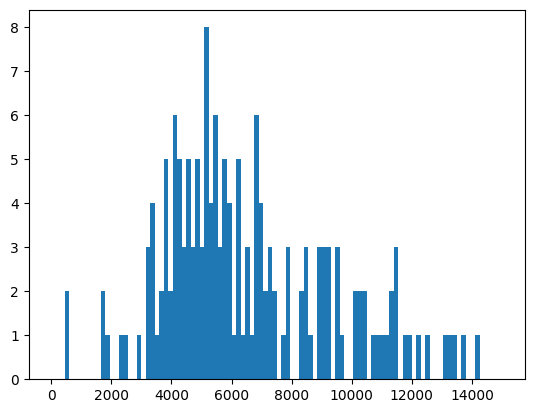

In [221]:
plt.hist(tot_photons_all_wrong_cams, bins=100, range=[0,15000])
plt.show()